# Simulate.ipynb
***
<br>

# Programming for Data Analysis 2021 - Project  

## Author - Ross Downey (G00398275)

## Lecturer - Dr. Brian McGinley
***

![](https://www.britishracecourses.org/wp-content/uploads/sites/17/2020/05/Types-of-Horse-Races.jpeg)

## Aim
***
<br>

The aim of this project is to simulate a real world phenomenon that can be measured, which one hundred data points could be collected across different variables. In this case I have chosen a number of famous horse races across the world. Types of variables involved with succesful horses in these races will be investigated, such as age, weight, rating, experience etc. The likely distributions of these variables will be simulated (based on previous trends) and also their relationships with each other will be examined.  
A dataset will then be simulated based on these variables' distributions in an attempt to predict the attributed of horses likely to be successful in these races.


## Python Packages
***
<br>

A number of python packages will be used over the course of this notebook. They are briefly summarized below

### Numpy
![](https://upload.wikimedia.org/wikipedia/commons/thumb/3/31/NumPy_logo_2020.svg/1920px-NumPy_logo_2020.svg.png) 
Numpy, or numerical Python, is a library used in Python to create different types of arrays or multi-dimensional matrices, and includes a large collection of mathematical functions to operate on these arrays.[1]. In this case Numpy will be used to simulate data using the numpy.random package based on certain mathematical distributions.  

### Pandas
![](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/640px-Pandas_logo.svg.png)  
Pandas is an open source library built for data analysis and manipulation in Python

### Matplotlib
![](https://miro.medium.com/max/1400/0*Q2P7piuSxFQIq60Z.jpg)  
Matplotlib is a plotting library used in python to create visual plots from data. [2]. For this case Matplotlib will be used to create certain plots to help present large amounts of numerical data, generated using Numpy, in a clear and concise manner using histograms, charts etc.  

### Seaborn  
![](https://files.ai-pool.com/a/21155149cb560f48f085a21264277c3c.png)  
Seaborn is also a plotting library used in Python. It is based on Matplotlib, but in this author's opinion can yield more visually appealing plots than Matplotlib in certain cases.  

### SQLite 3  
![](https://upload.wikimedia.org/wikipedia/commons/thumb/3/38/SQLite370.svg/1920px-SQLite370.svg.png)  
SQLite 3 is used to create an embedded database, this can be used to edit the simulated database when required.  

In [1]:
# Importing numpy for numerical arrays
import numpy as np

# For data manipulation and analysis
import pandas as pd

# For plotting
import matplotlib.pyplot as plt

# Also for plotting
import seaborn as sns

# Dates and time module
import datetime as dt

# Database handling
import sqlite3

## Background
***
Horse racing is a widely popular sport in many countries throughout the world. The basic premise is racing horses against each other over different conditions (distances, obstacles, surfaces etc.) to determine which is the fastest. Horse racing has been performed for thousands of years throughout the world in a variety of formats. There are records of horse races in Ancient Roman and Greek literature (particulary chariot races). [3]  From the 1400s to the 1800s a horse race closed the traditional Spring festival in Rome where riderless horses, imported from Africa, were raced along the Via del Corso (a long straight street).  Subsequent to this type of horse racing, the sport gained popularity with British royalty and aristocracy, earning it the title of "The Sport of Kings". This title has been maintained to this day, with a certain element of "high society" involved in owning and managing large stables and thoroughbreds worth millions of Euro.  
The sport also gained huge popularity with the working class, particular in terms of wagering on the outcomes of horse races. Bookmakers, or "bookies", will set certain odds on horses based on their perceived chances of winning, or placing (second, third, fourth etc.) and customers, or "punters" will place money with the bookmaker in an attempt to win money from the bookmaker based on the outcome of the races.  
The bookmaking component is likely the main reason for the ubiquitous popularity of the sport. The prohibitive cost of owning and maintaing horses, espcially thoroughbreds used in high profile races, prevents nealry all but the wealthy elite from becoming involved as owners. However, having money on a horse in a race, and the possibility of winning money on the outcome of these races, allows any person (provided they are over the permitted gambling age of 18...) have a level of interest. 

![](https://www.starsportsbet.co.uk/wp-content/uploads/2017/03/starring.jpg)  

The wagering element of horse racing is a big business. It is estimated that over $100 billion dollars annually is bet on horse races throughout the world.[4] The most popular horse race to gamble on is the English Grand National, run at Aintree racecourse every April. Approximately £300 million is bet on this race alone each year [5] , a staggering amount.  
There is also a prize fund given for winnning or placing (second, third, fourth etc.) to the winning owners, trainers, and jockeys. The prize fund for the English Grand National is in the region of £1 million pounds. [6]  I will discuss further details of this race, and others in subsequent sections.
Needless to say, when there is so much money (and prestige) involved in these races, having a statistical analysis to help predict a succesful entrant could prove very lucrative.  
For each horse race the bookmaker will set odds based on the chance or likelihood that the horse will finish the race in first position. These odds are usually in a fraction format such as 2/1 (two to one) or 13/2 (thirteeen to two) for example. This means that for every one euro bet the bookmaker will return two if the horse wins, or in the case of 13/2, for every two euro placed the bookmaker will return thirteen. There are also returns possible if the horse finishes second / third / fourth in a race. This is called placing in a race. Usually the bookmaker wil offer a quarter or a fifth of the odds for a horse, depending on the number of horses in a race. This type of bet, known as "each-way" costs more to put on (double a normal bet) as the bookmaker is offering more chances to win in the case of this bet.  
How the bookmaker sets these odds on each horse will be part of the focus of this notebook. The bookmaker will set odds based on what they perceive the chances of a horse being succesful in a race. There are a number of factors that can govern the decisions made to offer certain odds on a horse. These include, but are not limited to, the horse's age, the weight the horse is carrying, the official rating given to the horse, the experience of the horse, the condition of the ground on the racecourse, the stall the horse starts the race in etc.  
For the purposes of this project I will attempt to build a simulation model for the Aintree Grand National based on previous winners' attributes, and simulate what are the optimum variable values for a horse to be succesful in this races.

## Aintree Grand National
***
<br>
The Aintree Grand National (as the name suggests) is run at Aintree racecourse, near Liverpool, England, every April. It is probably the most famous horse race in the world and attract the largest number of bettors each year. First run in 1839, it is run over four miles and thirty fences, and is a gruelling test of horses' stamina and jockey's bravery. [6]  It is the most valuable horse race, terms of prize money offered, in Europe with a prize fund of £1 million pounds, and as stated previously, approximately £300 million pounds is wagered on this race alone each year.  
Many would argue that luck is the deciding factor in a race like this. With so many horses, running such a large distance, and clearing thirty or so jumps it is true that to be succesful in this race there is an element of luck involved. For example, if a horses is clearing a jump just behind another one, should the horse in front fall it is likely that they could bring down the trailing horse. However, I hope to show that there are certain attributes a horse can possess which can give them a far greater chance of success. I will now proceed to discuss each type of attribute and start to simulate data points using numpy.random based on these attributes.

### Age
***
<br>

![](https://thumbs.dreamstime.com/z/powerlifting-fitness-healthy-activities-grandfather-adult-age-old-man-character-cartoon-flat-design-vector-illustration-136691739.jpg)  

The age of the horse is one of the most important variables in this race. A novice, or inexperienced, horse has slim chance of managing to run over four miles and thirty fences succesfully. Conversely, as the race is such a gruelling test of stamina, an older horse with many miles on the clock so to speak is unlikely to make the distance in front of a younger, fresher horse. Those of us who attempted to play sport into their thirties can relate to this when facing younger opponents in their late teens, or early twenties... As suggested, there is a certain age range where a horse is far more likely to be successful in this race. A horse does not start their jump racing career until they are two or three years old (they are classed juveniles in this case), and cannot compete in the Aintree Grand National until they are at least seven years old. This age limit was set in 2011 following a number of fatal fallers in previous years. Prior to this a six year old horse had not won in the Grand National since 1915. [7]
An examination of previous winners of this race will give an indication of the optimum age range a horse should be, and the type of distribution that should be applied when simulating data. Although there has been over 150 runnings of this race, there have been a number of rule and condition changes over the years. Consequently, for the purposes of this exercise I will examine the previous twenty events to help build a representative sample. [8]  
The age profile of the previous twenty winners are as follows:  

- 0 have been seven years of age
- 5 have been eight years of age
- 4 have been nine years of age
- 5 have been ten years of age
- 4 have been eleven years of age
- 1 has been twelve years of age
- 0 have been thirteen years of age  

This indicates while there is not an optimum single age, there is definitely a range of eight years to eleven where the horse needs to be to have a decent chance of successful. Interestingly the numbers appear to be almost evenly distributed across this range. Consequently, the best distribution to use for this variable is the uniform distribution. The uniform distribution is used when each variable has an equal probability of being generated by numpy.random.  
For the purposes of this project I will simulate 200 outcomes for each variable. 

In [2]:
# Adapted from Numpy.random official documentation [9]
# Defining the random number generator
rng = np.random.default_rng()
# Setting the variables, min 8, max 11, 200 variables
age = rng.integers(low=8, high=12, size=200)
age

array([ 9,  8, 11, 11,  9, 10, 10,  9,  9,  8,  8,  9,  9,  9,  9,  9,  8,
       10,  8,  8,  8, 11,  8, 10, 11, 10, 10, 10, 10, 11,  8, 10, 11,  9,
        8, 10, 11, 11, 11,  8, 11,  8,  8, 10,  9,  8, 11,  9, 10, 11,  8,
       11, 10,  8, 11, 10, 11, 11, 11, 10, 11,  8, 10, 10,  9,  9, 11,  8,
        9,  8, 11,  9, 11, 10,  9, 11, 10,  8, 10, 11,  8,  9, 11,  8,  8,
       11,  9, 11,  9, 10,  8, 11,  9, 10, 11,  9,  9, 11, 11,  9,  9,  8,
       11, 10,  9,  9,  8, 10, 11, 10,  9, 10, 11,  8,  8, 11, 11,  8,  8,
        9,  8,  8,  9,  9, 10, 11,  8,  8, 11, 11, 11,  8, 11, 11,  8,  8,
        9,  8,  9, 10, 10,  9, 11, 10,  8, 10,  8, 11,  8,  8, 11, 10,  9,
       11,  9, 11, 10, 10,  9, 11, 10,  8, 10, 10,  9, 11,  9, 11, 10, 10,
       11, 11, 10,  8,  9,  8, 11, 11,  9, 11,  8, 11, 10, 11,  9,  8, 11,
        8, 10,  9,  9, 10, 11, 10, 11, 11,  9,  8,  9,  9], dtype=int64)

As is typically the case in large arrays generated using numpy, it is best to demonstrate these using plots instead of just showing the array itself.

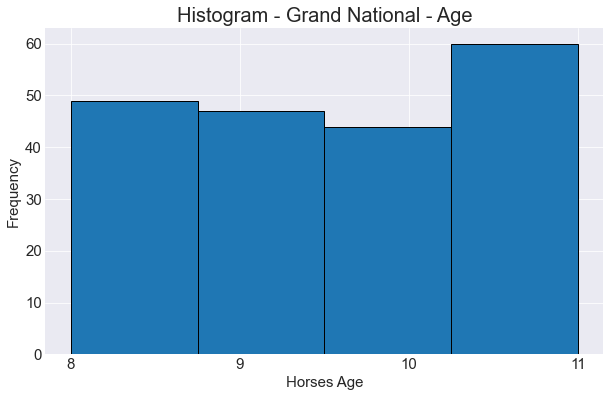

In [3]:
# Set the default plot style
plt.style.use('seaborn-dark')
plt.rcParams["figure.figsize"] = (10,6)

# Plotting
plt.hist(age, bins = 4, align='mid', edgecolor = 'black')

# Ref [10]
plt.locator_params(axis="both", integer=True, tight=True)

plt.title ('Histogram - Grand National - Age', size=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Horses Age', size=15)
plt.ylabel('Frequency', size = 15)
plt.grid(True)
plt.show()

The above histogram demonstrates a uniform histogram of ages in a the age range 8-10 for 200 determinations. Note they are not fully equally distributed as the sample size is 200. Should the sample size for this plot be increased we would see a fully even, uniform distribution with the three bars having the same frequency.

<br>

## Weight
***

<br>  

![](https://cdn.shopify.com/s/files/1/3012/5152/files/IMG_2911_large.jpg?v=1521686506)

Weight is also a vitally important aspect of this race. When speaking in terms of weight for handicap horse races this does not mean the actual weight of the horse itself. Instead, horses are given a certain weight to carry throughout the race, usually in the form of solid lead in pouches in the horse’s saddle along with the weight of each jockey. Jockey’s have to control their weight very carefully to ensure they don’t go over a certain value. In this type of handicap race all of the horses are classified and rated based on previous racing form. Horses that are perceived to be of a higher standard are given more weight to carry for the race. Conversely, horses that are less likely to be successful are given little to no extra weight. This is done for parity purposes. Equalizing each horse’s chance of winning a race makes for a better spectacle for the supporter, and gives each horses a fair chance. Should this handicapping not occur then horses of a lower standard would have a very slim chance of winning the race. The difference in weight from top to bottom in the Aintree Grand National can be up to as much as 2 stone. Note: A lot of measurements in the horse racing industry in this part of the world are done using the old imperial system (stones, pounds, furlongs and miles etc.)

Understandably there is a typical weight range a horses carries to victory in this race. Attempting to carry an extra 2 stone on their backs while running over 4 miles , and jumping over 30 fences, is an impressive feat, rarely does a horse carrying the extra weight of 2 stone prove to be successful, although it has been done by some exceptional horses. Also, horses that are not carrying much extra weight are not deemed to be at the required standard, or are too inexperienced, to emerge victorious. As a result of this system, some trainers and owners are reluctant to race their horses over a certain number of times. Should they believe they are in possession of a horse at a decent standard, the more they race and win, the more they will be handicapped and saddled with extra weight. There is a balance to be struck between giving the horse the experience of big races, and ensuring they don’t get over exposed to raters and penalized with extra weight for subsequent races. Some would say this is gaming of the system or cheating, but, the same procedure could be applied by all trainers and owners.

Assessing the last twenty runnings of the race yield the following weights (converted to pounds from stones and pounds) of the winners:

- None have been below 143 lbs

- Between 143 and 148lbs inclusive there have been 8 winners

- Between 149 and 153 inclusive there have been 5 winners

- Between 154 and 158 inclusive there have been 2 winners

- Between 159 and 163 there have been 4 winners.

- None 164 and over

This indicates that there is a certain optimum weight range where the chances of winning the race are increased depending on the weight the horse is carrying. It must be noted that some of the horses that won the race carrying large weight were exceptional, generational talents that are rarely seen. Particularly the likes of Tiger Roll, who won the race twice, once carrying 159lbs ( and was denied the chance of winning three in a row due the cancellation of the race during the COVID pandemic). Red Rum was another exceptional horse in the 1970s who was victorious three times, and once won the race carrying 12 stone. Red Rum’s legendary status was honoured with a burial at the wining post of the Aintree racecourse. [11]  
Taking the above into account, where some of the higher weight winners are rarely seen, then the data for weight indicates that a Pareto distribution would be most suitable to simulate data. A Pareto distribution, named after a famous Italian economist, sociologist and civil engineer Vifredo Pareto who performed studies on income and wealth distribution [12], yields a spread of data that is skewed to one side, but still includes a lower frequency of occurrences on the opposite side. [13].  
The skew of the data can be set by the user, along with the mode and other required values. 200 simulations will be performed to align with the previous example.

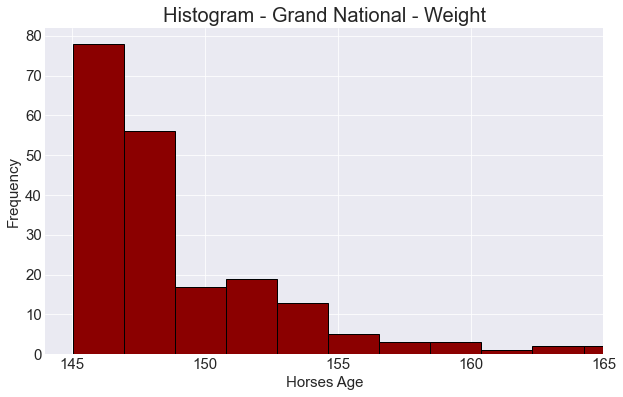

In [4]:
a = 40 # shape of data, (α is used in the mathematical formula)
m = 145 # mode of data, the value that appears most frequently in a set
# Generating 500 datapoiints in a Pareto distribution
weights = (np.random.default_rng().pareto(a, 200) + 1) * m 
rng.integers(200)



# Plotting
plt.style.use('seaborn-dark')
plt.locator_params(axis="both", integer=True, tight=True)

plt.hist (weights, bins=20, color = 'darkred', edgecolor = 'black')
plt.title ('Histogram - Grand National - Weight', size=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Horses Age', size=15)
plt.ylabel('Frequency', size = 15)
plt.xlim(xmin=144, xmax = 165)
plt.grid(True)
plt.show()

Plot was performed using floats to give a better appearance. Conversion from float to integer is required. Weight is applied to horses in integer form only

In [5]:
# Ref [13]
weights = weights.astype(int)
weights

array([151, 145, 150, 150, 148, 147, 145, 161, 145, 155, 147, 146, 148,
       158, 152, 157, 145, 148, 150, 146, 147, 145, 145, 146, 147, 151,
       148, 146, 148, 146, 146, 147, 147, 150, 145, 147, 147, 145, 147,
       145, 146, 145, 156, 149, 152, 150, 148, 148, 145, 148, 146, 148,
       145, 183, 150, 146, 149, 146, 146, 148, 145, 147, 148, 149, 147,
       145, 153, 148, 145, 151, 145, 151, 147, 145, 154, 145, 150, 148,
       146, 145, 146, 145, 150, 147, 150, 156, 147, 159, 145, 146, 146,
       152, 146, 148, 155, 151, 145, 153, 147, 146, 152, 146, 147, 150,
       147, 147, 145, 145, 152, 145, 146, 146, 147, 156, 146, 147, 145,
       147, 146, 146, 145, 147, 146, 156, 153, 159, 146, 147, 149, 147,
       148, 151, 147, 145, 151, 146, 146, 146, 150, 145, 151, 153, 152,
       153, 150, 147, 147, 145, 156, 145, 147, 146, 147, 147, 149, 147,
       146, 146, 153, 148, 154, 147, 146, 145, 147, 146, 149, 145, 163,
       148, 145, 151, 145, 148, 145, 146, 151, 151, 153, 148, 14

Now have an array of weights, in integer format, in a Pareto distribution.

<br>

## Breeding
***

<br>

![](https://s.equimed.com/images/arch/1/1s/1s.jpg)  

The breeding of the horse, particulary the country in which the horse was bred has beocme crucial in the past twenty years or so. In the original runnings of the race this was not an issue as horses were not transported between countries as they are nowadays. The sight of Irish 'Raiders' crossing the Irish Sea to compete in the largest UK races has become a familiar sight over the  past 50 years.  
While Irish success stories in the UK market were rare a long time ago, they have become a lot more common in the recent past. Thoroughbred breeding in Ireland has become a large business with Irish exports of horses, to 37 different countries, generating €227 million euro per annum [14].  
Ireland also produces 40% of the European Union's thoroughbreds, and 4 in 10 of the world's top rated stallions were based in Ireland in 2016.  
All of this has led to remarkable success in prestigious races, particularly in the UK. 15 of the previous 20 winners of the Aintree Grand National have been bred in Ireland. Taking this statistic a simple binomial distribution can be applied where there are two outcomes; one where the horse was bred in Ireland, and one where the horse was bred elsewhere (typcially the UK or France). The probability will be a three in four chance of Irish breeding or 0.75.

['Irish' 'Non-Irish' 'Non-Irish' 'Irish' 'Irish' 'Irish' 'Irish' 'Irish'
 'Irish' 'Irish' 'Irish' 'Irish' 'Irish' 'Irish' 'Irish' 'Non-Irish'
 'Non-Irish' 'Irish' 'Irish' 'Irish' 'Irish' 'Irish' 'Irish' 'Irish'
 'Irish' 'Irish' 'Irish' 'Irish' 'Non-Irish' 'Irish' 'Irish' 'Irish'
 'Irish' 'Irish' 'Irish' 'Irish' 'Irish' 'Non-Irish' 'Irish' 'Irish'
 'Irish' 'Irish' 'Irish' 'Irish' 'Irish' 'Irish' 'Irish' 'Irish' 'Irish'
 'Irish' 'Irish' 'Irish' 'Irish' 'Irish' 'Irish' 'Irish' 'Irish' 'Irish'
 'Irish' 'Non-Irish' 'Irish' 'Irish' 'Irish' 'Irish' 'Irish' 'Irish'
 'Irish' 'Irish' 'Irish' 'Irish' 'Irish' 'Irish' 'Non-Irish' 'Irish'
 'Non-Irish' 'Non-Irish' 'Irish' 'Irish' 'Irish' 'Irish' 'Non-Irish'
 'Irish' 'Irish' 'Irish' 'Irish' 'Irish' 'Irish' 'Irish' 'Non-Irish'
 'Non-Irish' 'Irish' 'Non-Irish' 'Irish' 'Irish' 'Irish' 'Irish' 'Irish'
 'Irish' 'Irish' 'Non-Irish' 'Non-Irish' 'Irish' 'Irish' 'Non-Irish'
 'Irish' 'Irish' 'Non-Irish' 'Irish' 'Non-Irish' 'Irish' 'Irish'
 'Non-Irish' 'Irish' '

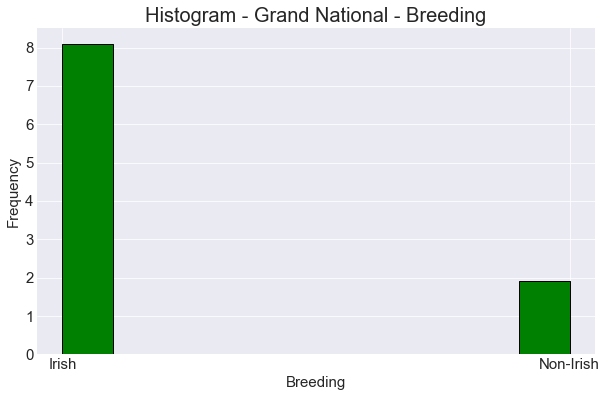

In [6]:
# Generating an array of Irish / Non-Irish bred horses
breeding_choices = ['Irish', 'Non-Irish'] 
breeding = np.random.choice(breeding_choices, 200, p=[0.75, 0.25])
print(breeding)

plt.style.use('seaborn-dark')
plt.hist(breeding, color = 'green', edgecolor = 'black', density = True)
plt.title ('Histogram - Grand National - Breeding', size=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Breeding', size=15)
plt.ylabel('Frequency', size = 15)
plt.grid(True)
plt.show()

Now have an array of 200 with two choices, Irish and Non-Irish bred horses, with a probability of 0.75 that the horse was Irish bred. This array reflects the real world probability of the winner if the race being bred in Ireland. A histogram is not really necessary for this section but included for visual comprehension purposes.

<br>

## Bookmakers Odds
***

<br>

![](https://i.guim.co.uk/img/media/a35509b227d47f7564101894080c1b0e308ed007/0_117_3500_2100/master/3500.jpg?width=700&quality=85&auto=format&fit=max&s=947fd4324a2368442ab257375c25b657)  




Bookmakers, or "bookies" as they are known, are an intrinsic part of horse racing culture, and have been for numerous years. Bookmakers set odds on horses winning the race based on what they perceive the horses' chances are of winning the race. Bookmaking was only legalized in the UK in 1961 [15], before that unofficial bookmakers illicitly took bets in secret on horse races, and other sports. The term "shady dens of inequity" was used to describe bookmakers' shops when they first openend in 1960s due to the shabby conditions, and some would say the type of character that was initially attracted. The legalisation of betting shops also allowed for the revenue to be measured, and taxes to be collected. These days however, bookmaker's shops are slick and presentable, drawing large crowds from a large cross-section of society. Online gambling has also exploded in popularity in recent years, where people can use apps on their mobile devices to place bets any place, any time.  
In 2019 almost €52 million was collected by revenue in Ireland from bookmakers offices, and a further €40.6 million in online receipts. [16]. According to the European Gaming and Betting Association sports betting accounts for €10 billion of tax intake in 2019.  
This amount of betting has created a large number of problem gamblers. It is estimated that 7% of all gamblers will develop an issue in terms of addiction. Less than 1% of gamblers are seen as addicted, but these account for 30-35% of bookmaker's profits. Another frightening statistic is that over €5 billion euro is gambled in Ireland each year, equating to €10,000 per minute [17]  Most customers of bookmakers, or "punters", are capable of placing bets without developing addiction issues, and do so regularly, particularly on the racecourse itself on big racedays.  
To give an example of odds the bookmaker will assess the horse's chances, based on previous races, weight, age, etc. They will then "price" each horse in the race. Should they offer odds of, say, 10/1 (ten to one) this means the bookmaker believes that if the race was run ten times, the horse would win once. If the horse was 100/1, then it would take a hundred runnings of the race before the horse would win. If a punter places €1 on a horse at 10/1 and the horse wins, then the bookmaker will pay the punter €10 plus their €1 stake in return.  
The bookmaker also offers odds for horses coming in second, third, fourth etc. known as "placing", but for the purposes of this notebook, I will only consider winning entries.  
The bookmaker's odds can also change before a race. Should the bookmaker offer certain odds on race, and punters believe that these odds are too generous and start betting money on the horse at these odds, then the bookmaker will start to shorten the odds in order to avoid losing too much. Conversely, should a horse not get bet on at certain odds, the bookmaker will lengthen their odds in order to attract more punters. This demonstrates that there is a balance to be struck in order for a bookmaker to make profit from a race.  
Consequently, the odds a horse has been assigned by the bookmaker, and adjusted based on betting patterns, can be a good indication of a horses chances of being successful in the race. Analysis of the previous twenty years' winners yields the following:

- 3 have been 10/1 or less
- 7 have been between 10/1 and 20/1
- 7 have been between 20/1 and 33/1
- 3 have been 33/1 or greater

Note: There has been a winner of 100/1 of the race ( Mon Mome in 2009), however, this would be considered an extreme outlier. Attempting to include this in a normal distribution of data would skew the data and it is best to remove this from the data.  Also, typically as this is seen as a wide open race, horse's odds don't typically get too low. The horse Tiger Roll won his second national at odds of 4/1, but this could also be considered an outlier. Typically the favourite (the horse with the lowest odds) has odds in the range of 7 to 10/1. As a result, the standard deviation of the data will be set to give a minimum of approx 7/1 and a maximum of approx 40 to 50/1

This indicates that the winning odds are in a normal distribution, around a value of approximately 20/1. In a normal distribution all data is centered, or symmetrical, around the mean, the further from the mean the variable is, the less likely it is to occur. Data is visually represented as a “bell-shaped curve” where the highest probability of a variable occurring coincides with the top of the curve i.e. the mean.  
A normal distribution is also called a Gaussian distribution, named after a German physicist and mathematician Carl Friedrich Gauss who first suggested the normal distribution of data in the early 1800s, although there is some dispute as to who first developed the theory for this distribution [18].  
I will now simulate a normal distribution of data based on the odds above, using integers instead of odds of 10/1 etc. to simplify the simulation.

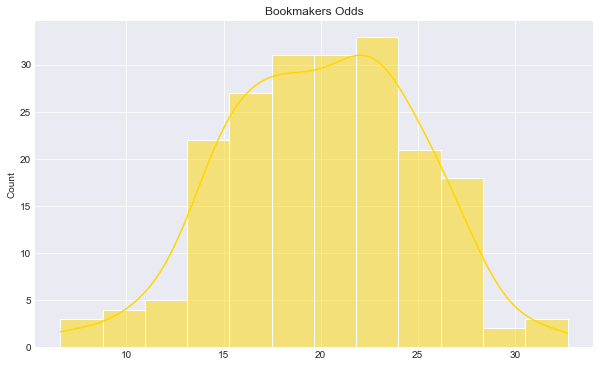

In [7]:
# Generating the set of data
# Setting mean as twenty, standard deviation as 5,
# 97% of data will be within 5 and 35 in this case (3 x Std Dev)
odds = np.random.normal(20, 5, 200)

# Plotting (Using Seaborn for variation in style)
for style in ['darkgrid']:
    sns.set_style(style)
    sns.histplot(data = odds, color = 'gold', kde = True,)
    plt.title ("Bookmakers Odds")
    plt.show()

In [8]:
# Rounding to integers to reflect real odds' format
odds = odds.astype(int)
odds

array([23, 21, 24, 22, 23, 27, 27, 24, 28, 17, 16, 15, 20, 10, 18, 14, 23,
       21, 20, 21,  6, 23, 23, 18, 19, 18, 29, 16, 20, 23, 22, 21, 16, 32,
       18, 20, 10, 26, 20, 20, 23, 15,  6, 15, 23,  7, 25, 23, 20, 15, 26,
       27, 23, 21, 21, 22, 24, 15, 25, 25, 19, 25, 14, 13, 23, 19, 30, 26,
       22, 15, 18, 18, 22, 12, 19, 14, 14, 21, 10, 25, 22, 27, 22, 15, 21,
       22, 13, 17, 19, 22, 12, 17, 15, 17, 14, 26, 25, 15, 24, 17, 10, 18,
       17, 25, 28, 25, 16, 24, 25, 26, 22, 24, 17, 15, 20, 18, 15, 26, 11,
       17, 21, 26, 15, 19, 17, 15, 18, 13, 17, 22, 22, 24, 23, 18, 17, 29,
       21, 27, 21, 19, 18, 10, 20, 26, 14, 13, 20, 19, 21, 17, 16, 18, 20,
       17, 20, 26, 17, 25, 15, 23, 16, 24, 15, 24, 16, 18, 20, 13, 20, 13,
       15, 27, 13, 17, 18, 21, 21, 18, 23, 13, 31, 23, 21, 18, 16, 22, 24,
       15, 25, 14, 22, 22, 28, 15, 21, 18, 23, 12, 15, 16])

<br>  

We now have an normally distributed array, simulating the odds of winners, for 200 runnings of the race.

<br>

## Rating / Form
***

<br>

![](https://us.123rf.com/450wm/scusi/scusi1803/scusi180300041/98289180-jockeys-with-race-horses-on-the-racetrack.jpg?ver=6)  

As discussed previously horses are given ratings based on previous performances in races in an attempt to give all runners the same chance of being successful. Weights are applied based on these ratings. As we also have the rating given to each winner readily available we can also create an array based on the ratings' of previous winners. The ratings for the Aintree Grand National, and all horse races in Britain, are given by the British Horseracing Authority (BHA). The rating is a representation of the horse's form over their past races. [19] 
Looking at the previous twenty years' winners the folling ratings were observed: 


- 7 were between 135 to 140
- 3 were between 140 to 145
- 5 were between 145 to 150
- 2 were between 150 to 155
- 2 were between 155 to 160

Although initially this looks like a Poisson distribution, a closer inspection of the data indicates that the majority of the winners with a rating between 135 and 140 occurred during the early 2000s. Rule changes that have occurred since then seems to have favoured horses with slighly higher ratings. Consequently, I will simulate a uniform distribution, same as the age parameter, in this case in an attempt to get a representative set of data.


In [9]:
# Defining the random number generator
rng = np.random.default_rng()
# Setting the variables, min 135, max 160, 200 variables
rating = rng.integers(low=135, high=160, size=200)
rating

array([138, 149, 145, 154, 158, 157, 142, 147, 152, 144, 142, 154, 136,
       141, 153, 152, 147, 150, 153, 151, 156, 150, 140, 145, 155, 147,
       140, 142, 137, 135, 156, 146, 135, 150, 150, 147, 141, 139, 135,
       153, 139, 139, 148, 158, 150, 137, 135, 140, 157, 144, 139, 136,
       154, 149, 146, 139, 159, 157, 144, 152, 158, 153, 140, 151, 141,
       137, 159, 138, 139, 153, 157, 154, 152, 157, 143, 141, 139, 148,
       151, 152, 151, 143, 156, 139, 158, 155, 150, 153, 148, 155, 139,
       144, 150, 137, 146, 148, 138, 155, 146, 142, 159, 140, 145, 145,
       158, 150, 138, 159, 148, 157, 146, 139, 136, 144, 154, 145, 148,
       141, 137, 148, 147, 159, 154, 135, 144, 139, 143, 145, 137, 146,
       158, 142, 155, 140, 158, 149, 152, 145, 140, 136, 155, 142, 139,
       147, 148, 159, 156, 156, 148, 139, 146, 156, 147, 153, 143, 142,
       151, 154, 143, 135, 151, 137, 154, 152, 135, 157, 152, 152, 138,
       142, 159, 136, 158, 137, 154, 146, 148, 147, 158, 152, 15

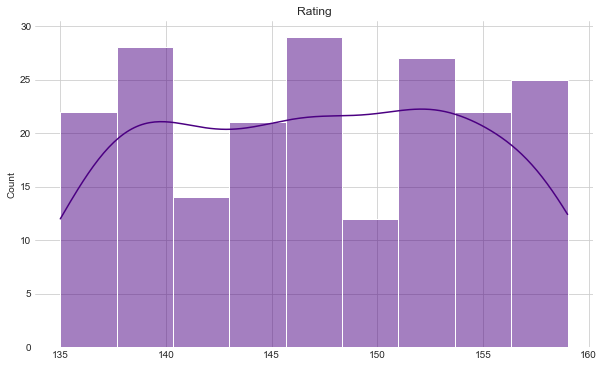

In [10]:
# Plotting
for style in ['whitegrid']:
    sns.set_style(style)
    sns.histplot(data = rating, color = 'indigo', kde = True,)
    plt.title ("Rating")
    plt.show()

<br>  

We now have a set of arrays simulated based on the characteristics of winning horses of the Aintree Grand National. We can begin to combine all of these arrays into one dataframe using pandas.

In [11]:
# Creating empty dataframe to populate with arrays
national = pd.DataFrame(columns = ["Ages", "Weights", "Breeding", "Odds", "Rating"])
national

,Ages,Weights,Breeding,Odds,Rating


In [12]:
# Adding ages data
national["Ages"] = age

# Adding weights data
national["Weights"] = weights

# Adding Breeding data
national["Breeding"] = breeding

# Adding odds data
national["Odds"] = odds

# Adding rating data
national["Rating"] = rating

national

,Ages,Weights,Breeding,Odds,Rating
0,9,151,Irish,23,138
1,8,145,Non-Irish,21,149
2,11,150,Non-Irish,24,145
3,11,150,Irish,22,154
4,9,148,Irish,23,158
...,...,...,...,...,...
195,11,148,Irish,18,138
196,9,148,Non-Irish,23,135
197,8,145,Irish,12,147
198,9,145,Non-Irish,15,147


In [13]:
# Saving current date and time as a function
now = dt.datetime.now()

# Convert date and time to a string
nowstr = now.strftime('%Y%m%d_%H%M%S')

# Creating filepath for simulated database to be saved
filepath = 'data/sim_national' + nowstr + '.csv'

# Saving dataframe
#national.to_csv(filepath)

<br>  

## Investigation of Simulated Database

<br>  
Need to investigate simulated database to help determine its validity.

In [14]:
# Basic Information
# No "Nan" values, 200 counts for all columns
# Integers except for breeding column
national.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Ages      200 non-null    int64 
 1   Weights   200 non-null    int32 
 2   Breeding  200 non-null    object
 3   Odds      200 non-null    int32 
 4   Rating    200 non-null    int64 
dtypes: int32(2), int64(2), object(1)
memory usage: 6.4+ KB


In [15]:
# Basic statistical details
national.describe()

,Ages,Weights,Odds,Rating
count,200.00000,200.000000,200.000000,200.000000
mean,9.57500,148.605000,19.600000,147.090000
std,1.15805,4.638594,4.894875,7.216808
min,8.00000,145.000000,6.000000,135.000000
25%,9.00000,146.000000,16.000000,140.750000
50%,10.00000,147.000000,20.000000,147.000000
75%,11.00000,150.000000,23.000000,153.000000
max,11.00000,183.000000,32.000000,159.000000


<br>  
Note: The "describe" function excludes the breeding column as it is not an integer but an object.  
The "describe" function gives us a basic statistical summary of the dataframe. We can see from this that the mean age of a simualted winner is 10, the mean weight is 149, the mean odds are 20/1, and the mean rating is 146. The standard deviation values are a good indication of the variance of these values, but is only really applicable for the normal distribution, in this case the rating values.

<AxesSubplot:xlabel='Ages', ylabel='count'>

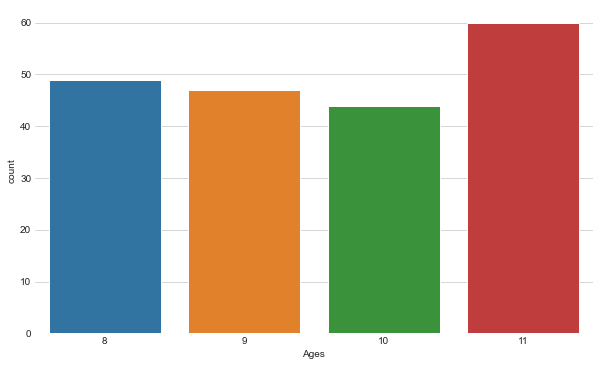

In [16]:
# Using Seaborn countplots to visually assess each parameter
# All distributions are as expected, uniform, poission, normal etc.
sns.countplot(x= 'Ages', data = national)

<AxesSubplot:xlabel='Weights', ylabel='count'>

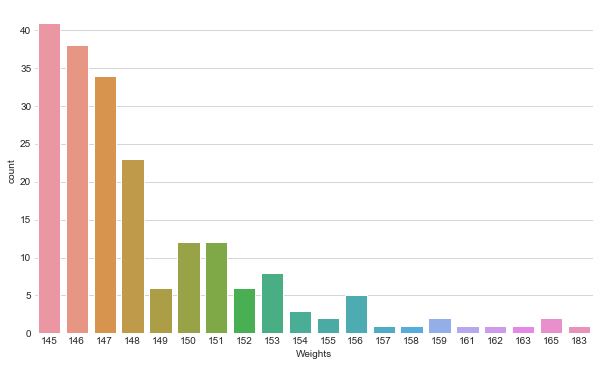

In [17]:
sns.countplot(x= 'Weights', data = national)

<AxesSubplot:xlabel='Odds', ylabel='count'>

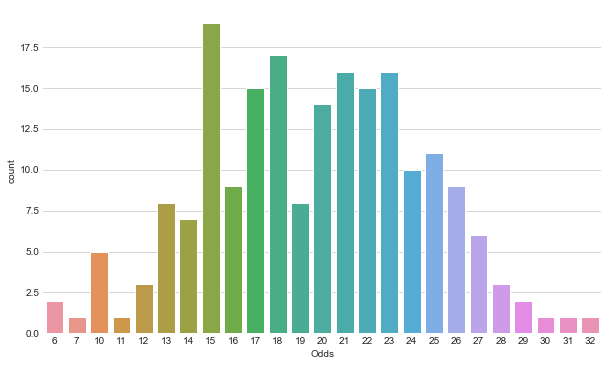

In [18]:
sns.countplot(x= 'Odds', data = national)

<AxesSubplot:xlabel='Rating', ylabel='count'>

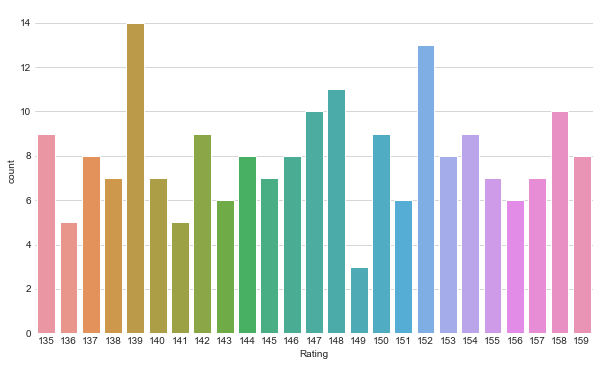

In [19]:
sns.countplot(x= 'Rating', data = national)

<AxesSubplot:xlabel='Breeding', ylabel='count'>

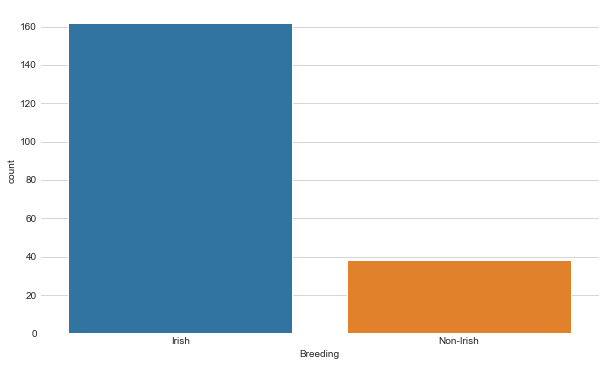

In [20]:
sns.countplot(x= 'Breeding', data = national)

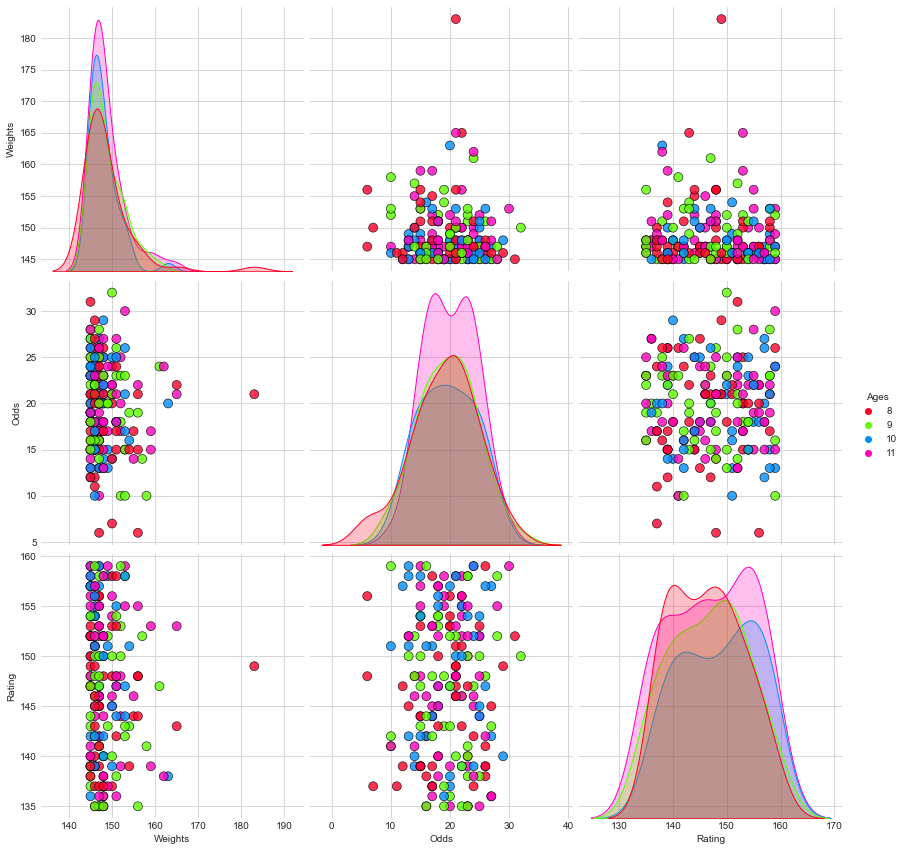

In [21]:
# Using pairplot function to visually assess if there are variables
# that are correlating with each other
# Note: Breeding is again excluded as it is non-numerical
sns.pairplot(national, hue = 'Ages', diag_kind = 'kde',
             plot_kws = {'alpha': 0.8, 's': 80, 'edgecolor': 'black'},
            height = 4, palette = 'gist_rainbow')

<br>  
No obvious relationship between two variables can be seen. Data appears to be randomly scattered when plotted against each other. This is to be expected as the variables chosen for the race are independent. The only two variables that could be related would be rating and odds. The odds for a horse should generally be shorter if they are rated higher. As stated earlier though, this should be offset by the extra weight added.  
Another option to assess for any correlation is a heatmap in seaborn

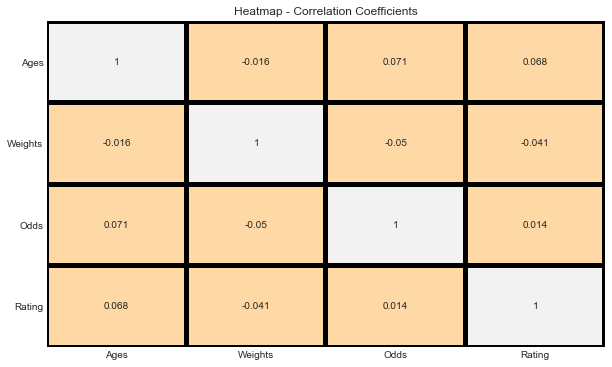

In [22]:
# Plotting heatmap to assess correlation
# Ref [20]
sns.heatmap(national.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap = 'Pastel1',
linewidths = 4, linecolor = 'black', cbar = False) # Formatting appearance
plt.title('Heatmap - Correlation Coefficients')
plt.yticks (rotation = 0) # Rotating y-axis label makes it easier to read
plt.show()

The heatmap confirms that there is no correlation between any of the variables. The closer to one a correlation value is the more likely they are dependent variables, i.e one increases / decreases as the other increases / decreases.  
Ideally the dataset could be tested using a machine learning package such as Scikit Learn to help predict how successful the simulation would be in the real world. As there is no classification to be tested, like in the iris dataset, Scikit Learn cannot be used in this instance.  


<br>  

## SQLite 3 Database
***

<br>  


In [23]:
# Using guidance from lecture material
# Creating connection and cursor to SQLite 3 
# and naming new database "national"
conn = sqlite3.connect('national')
c = conn.cursor()

# Creating table in new database with same columns as pandas dataframe
c.execute(
    'CREATE TABLE IF NOT EXISTS national (Ages,Weights,Breeding,Odds,Rating)')
conn.commit()

# Add pandas dataframe to SQLite 3
national.to_sql('national', conn, if_exists='replace', index = False)
 
# Calling all data from database (* is wildcard)
c.execute('''  
SELECT * FROM national
          ''')
# Output, remove '#' below for full output
#c.fetchall()

<br>  
Can use the SQLite database created to add any further simulations to the data if required in the future.

<br>  

## Conclusion  
***

<br>  


![](https://i2-prod.dailyrecord.co.uk/incoming/article23890781.ece/ALTERNATES/s615/0_2021-Randox-Health-Grand-National.jpg)  

<br>

The above example is a good demonstration of simualted data and how effective it can be. Taking basic trends from the previous real world occurences and simulating numerous instances has yielded a comprehensive set of data that can be used to predict the attributes that a succesful racehorse may have in this race.  

Other examples of simluating data based on real-world phenomena include weather forecasting, prediciting student grades or the current COVID-19 pandemic where deaths, for example, could be simulated based on factors such as age, gender, health status etc. In this instance predicitive models could be created based on the population not being in lockdown, or not being vaccinated, and compared with the population being vaccinated and/or under lockdown. The benefits of this are that this data could then be used to inform Governmental decisions on restrictions so as to prevent the health service from being overwhelmed, and/or to prevent needless deaths.  
Simualted data can also be a more cost effective way to build models, instead of waiting to collect actual data from a set of criteria, being able to simulate a model from small amount of real-world occurences could save time, and money if say it is cost prohibitive to collect the actual data.  

A negative side to simulated data would be in its accuracy. The creation of simulated data is done under certain assumptions using a relative small sample size. Should one or more of these assumptions be incorrect, or if the sample taken was not representative of the whole population of data, this will lead to inaccuracies. An inaccurate predicitive model is undesirable, and could have significant ramifications when taken in the context of the COVID-19 models. An innaccurate horse racing predictor would not be as distastrous...  

While the above simulation is not perfect in predicting the outcome of the Aintree Grand National (As mentioned initially, there is a certain element of chance involved in all horse races) I believe this dataset could be used to increase someone's chances of picking a horse with a decent chance in the race, or for an owner / trainer of a horse to determine of their horse is likely to succeed.

## References
***
<br>

[1] https://en.wikipedia.org/wiki/NumPy  
[2] https://en.wikipedia.org/wiki/Matplotlib  
[3] https://en.wikipedia.org/wiki/Horse_racing  
[4] https://en.wikipedia.org/wiki/Betting_on_horse_racing  
[5] https://www.independent.co.uk/sport/racing/grand-national-2019-prize-money-how-much-winner-earn-aintree-latest-a8856996.html  
[6] https://en.wikipedia.org/wiki/Grand_National  
[7] https://www.theguardian.com/sport/2011/nov/02/minimum-age-grand-national-runners  
[8] https://en.wikipedia.org/wiki/List_of_Grand_National_winners  
[9] https://numpy.org/doc/stable/reference/random/index.html  
[10] https://stackoverflow.com/questions/27496737/how-to-force-matplotlib-to-display-only-whole-numbers-on-the-y-axis  
[11] https://en.wikipedia.org/wiki/Red_Rum  
[12] https://en.wikipedia.org/wiki/Vilfredo_Pareto  
[13] https://moonbooks.org/Articles/How-to-convert-a-float-array-to-an-integer-array-in-python-/  
[14] https://en.wikipedia.org/wiki/Horse_racing_in_Ireland  
[15] https://en.wikipedia.org/wiki/Bookmaker  
[16] https://www.irishtimes.com/news/social-affairs/irish-fourth-worst-gamblers-in-eu-as-move-online-accelerates-1.4617386  
[17] https://www.rutlandcentre.ie/addictions-we-treat/gambling  
[18] https://en.wikipedia.org/wiki/Carl_Friedrich_Gauss  
[19] https://www.britishhorseracing.com/regulation/guide-to-handicapping/  
[20] https://heartbeat.fritz.ai/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07    
[21] https://en.wikipedia.org/wiki/Epsom_Derby  

<br>

## End
***
***